##1. Newton Rapson

$$
x^2-y^2-2 = 0
$$
$$
y - 0.1 sin⁡(x) =0
$$

$$
J = \begin{bmatrix}2x&-2y \\ -0.1cos(x)& 1 \end{bmatrix}
$$

Iterate using 
$$
𝑦_{n+1} = 𝑦_{n} − J^{-1}F
$$



In [2]:
import numpy as np
def F(yvec):
  x = yvec[0]
  y = yvec[1]
  return np.array([x**2-y**2-2,
                   y-0.1*np.sin(x)])

def J(yvec):
  x = yvec[0]
  y = yvec[1]
  return np.array(
      [
       [2*x,-2*y],
       [-0.1*np.cos(x),1]
      ]
  )

In [4]:
y0 = np.array([2,2])
print(F(y0))
print(J(y0))


[-2.          1.90907026]
[[ 4.         -4.        ]
 [ 0.04161468  1.        ]]


In [7]:
def JNum(F,yvec):
  n = len(yvec)
  Jret = np.ndarray(shape=(n,n))
  delta = 0.0001
  I = np.identity(n)
  for i in range(0,n):
    col = (F(yvec+I[i]*delta/2)-F(yvec-I[i]*delta/2))/delta
    for j in range(0,n):
      Jret[j][i] = col[j]
  return(Jret)

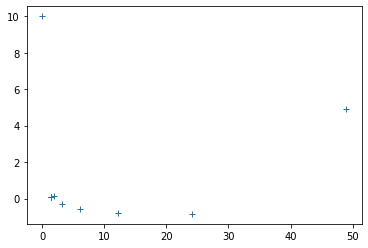

array([[ 0.        , 10.        ],
       [49.00000002,  4.9       ],
       [24.19129753, -0.84110641],
       [12.1498183 , -0.78962828],
       [ 6.16972696, -0.58733398],
       [ 3.24770468, -0.30164502],
       [ 1.90634915,  0.12278979],
       [ 1.48076747,  0.10843687],
       [ 1.41899148,  0.0990396 ],
       [ 1.41766324,  0.09882989],
       [ 1.41766263,  0.09882979],
       [ 1.41766263,  0.09882979],
       [ 1.41766263,  0.09882979],
       [ 1.41766263,  0.09882979],
       [ 1.41766263,  0.09882979],
       [ 1.41766263,  0.09882979],
       [ 1.41766263,  0.09882979],
       [ 1.41766263,  0.09882979],
       [ 1.41766263,  0.09882979],
       [ 1.41766263,  0.09882979],
       [ 1.41766263,  0.09882979]])

In [16]:
import matplotlib.pyplot as plt
y = []
y.append(np.array([0,10]))

for i in range(0,20):
  #y.append(y[-1]-np.linalg.inv(J(y[-1]))@F(y[-1]))
  y.append(y[-1]-np.linalg.inv(JNum(F,y[-1]))@F(y[-1]))
  delta = y[-1]-y[-2]

y = np.array(y)
plt.plot(y[:,0],y[:,1],'+')
plt.show()
y

1 Roots of the system: [1.41766263, 0.09882979],[ -1.41766263,  -0.09882979]

##2. N1 is 1 and all rest are 0

$$n1 = 1$$

$$\dot{n}_1 = \frac{-2n^{2}_{1}}{10000} - \sum_{i=2}^{1000}n_1n_i$$

$$\dot{n}_2 = \frac{n^{2}_{1}}{10000}-n_1n_2$$

$$\dot{n}_i = n_{i-1}n_1-n_in_1$$

$$\dot{n}_{1000} = n_{999}n_1$$

$$i = 3...1000$$



In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import copy

n0 = np.zeros(1000)
n0[0] = 1

def Grain(n,t):
  n0 = n[0]
  n1 = n[1]
  newN = copy.copy(n)
  sum = np.sum(n[1:])*n0
  newN[0] = -(2*n0**2)/10000 - sum
  newN[1] = (n0**2)/10000 - n0*n1
  i = 2
  while i<999:
    newN[i] = n[i-1]*n0-n[i]*n0
    i = i +1
  newN[-1] = n[-2]*n0
  return newN



In [2]:
def N(n):
  n0 = n[0]
  n1 = n[1]
  newN = copy.copy(n)
  sum = np.sum(newN[1:])*n0
  newN[0] = -(2*n0**2)/10000 - sum
  newN[1] = (n0**2)/10000 - n0*n1
  i = 2
  while i<999:
    newN[i] = n[i-1]*n0-n[i]*n0
    i = i +1
  newN[-1] = n[-2]*n0
  return newN

In [3]:
!pip install numdifftools 
import numdifftools as nd
n0 = np.zeros(1000)
n0[0] = 1
J = nd.Jacobian(N)
Jacob = J(n0)
Jacob


     |████████████████████████████████| 962kB 8.8MB/s 


array([[-4.e-04, -1.e+00, -1.e+00, ..., -1.e+00, -1.e+00, -1.e+00],
       [ 2.e-04, -1.e+00,  0.e+00, ...,  0.e+00,  0.e+00,  0.e+00],
       [ 0.e+00,  1.e+00, -1.e+00, ...,  0.e+00,  0.e+00,  0.e+00],
       ...,
       [ 0.e+00,  0.e+00,  0.e+00, ..., -1.e+00,  0.e+00,  0.e+00],
       [ 0.e+00,  0.e+00,  0.e+00, ...,  1.e+00, -1.e+00,  0.e+00],
       [ 0.e+00,  0.e+00,  0.e+00, ...,  0.e+00,  1.e+00,  0.e+00]])

In [180]:
lam = np.linalg.eigvals(Jacob)
SR = np.max(np.abs(lam))/np.min(np.abs(lam))
print(SR)

139.08639396952773


Stiffness ratio is 139

In [4]:
nStart = np.zeros(1000)
nStart[0] = 1
tspan = [1,600]
t_eval = np.linspace(tspan[0],tspan[1],100)
sol = odeint(Grain,nStart,t_eval,atol=1.0e-8,rtol=1.0e-8)


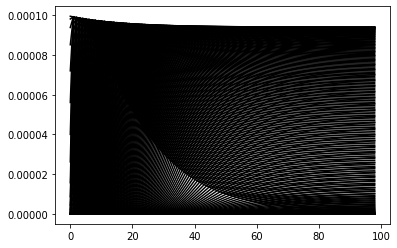

In [220]:
plt.plot(sol[1:,1:],color='black')
plt.show()

In [ ]:
plt.plot(range(1,1000),sol[i,1:],'x')
plt.show()

In [27]:
for i in range(800):
    plt.plot(range(0,100),sol[:,i],'x')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [221]:
maxes = []
for i in range(1000):
    maxes.append(np.max(sol[:,i]))

maxes




[1.0,
 9.952957066428441e-05,
 9.927665307364437e-05,
 9.934498034516552e-05,
 9.927619617000541e-05,
 9.886196590556926e-05,
 9.89776791904469e-05,
 9.903610329694492e-05,
 9.897221081997457e-05,
 9.866917516931685e-05,
 9.866331417022776e-05,
 9.874178608042041e-05,
 9.872887804755324e-05,
 9.855604293201239e-05,
 9.833950491272587e-05,
 9.844517385719913e-05,
 9.848248442925682e-05,
 9.84082922735412e-05,
 9.815957248949475e-05,
 9.81409420155432e-05,
 9.821951191563358e-05,
 9.821623096540337e-05,
 9.808925160528712e-05,
 9.783253536108383e-05,
 9.794419219078874e-05,
 9.799232103883201e-05,
 9.794791141902085e-05,
 9.777157835730203e-05,
 9.766442774218053e-05,
 9.775000579029173e-05,
 9.776209084482732e-05,
 9.767163199620954e-05,
 9.744110159973818e-05,
 9.750247115194671e-05,
 9.755399327935019e-05,
 9.752145687119896e-05,
 9.73757241802457e-05,
 9.726073763633579e-05,
 9.73393868641406e-05,
 9.734564586677794e-05,
 9.72558379653589e-05,
 9.704063674615432e-05,
 9.7130636939356

The system grain size formed around 0.0001 and they approach 0 as the system comes to equilibrium

##3. Lagrangian Dynamics

$$SpringE = \frac{1}{2}k_1y_1^2 + \frac{1}{2}k_2(y_2-y_1)^2+\frac{1}{2}k_3(y_3-y_2)^2$$

$$GP = -g(m_1y_1+m_2y_2+m_3y_3)$$

$$L = T - V$$

$$T = \frac{1}{2}m_1\dot{y}^2_1 + \frac{1}{2}m_2\dot{y}^2_2+ \frac{1}{2}m_3\dot{y}_3^2$$

$$V = SpringE + GP$$

$$L = \frac{1}{2}m_1\dot{y}^2_1 + \frac{1}{2}m_2\dot{y}^2_2+ \frac{1}{2}m_3\dot{y}_3^2 - (\frac{1}{2}k_1y_1^2 + \frac{1}{2}k_2(y_2-y_1)^2+\frac{1}{2}k_3(y_3-y_2)^2 - g(m_1y_1+m_2y_2+m_3y_3))$$

Find partials of $y_i$ and $\dot{y}_i$ for  i = 1...3 resulting in the acceleration equations

$$
\ddot{y}_1 = \frac{-k_1y_1 + k_2(y_2-y_1)}{m_1}- g
$$

$$
\ddot{y}_2 = \frac{-k_2(y_2-y_1)+k_3(y_3-y_2)}{m_2} - g
$$

$$
\ddot{y}_3 = \frac{-k_3(y_3+y_2)}{m_2} - g
$$

Get in terms of y1,y2,y3

$$\ddot{Y} = 
\left( \begin{matrix}
\ddot{y_1} \\ \ddot{y_2} \\ \ddot{y_3} \end{matrix} \right) 
$$

$$Y = \left( \begin{matrix}
y_1 \\ y_2 \\ y_3 \end{matrix} \right)$$

$$
\ddot{Y}=
\left( \begin{matrix}
\frac{-k_1+k_2}{m_1} & \frac{k_2}{m_1} & 0\\[3pt]
\frac{k_2}{m_2} & -\frac{k_2+k_3}{m_2} & \frac{k_3}{m_2} \\ 0 & \frac{k_3}{m_3} & -\frac{k_3}{m_3}
\end{matrix} \right)Y
$$


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [29]:
#IC
k1 = 1
k2 = 1
k3 = 1
m1 = 1
m2 = 1
m3 = 1
y10 = 1
y20 = 2
y30 = 3
y1d = 0
y2d = 0
y3d = 0
g = -9.8

In [41]:
def dynamics(yvec,t):
  y1 = yvec[0]
  y2 = yvec[1]
  y3 = yvec[2]
  y1d = yvec[3]
  y2d = yvec[4]
  y3d = yvec[5]
  y1dd = -y1*((k1+k2)/m1)+y2*(k2/m1)
  y2dd = y1*(k2/m2)-y2*((k2+k3)/m2)+y3*(k3/m2)
  y3dd = y2*(k3/m3)-y3*(k3/m3)
  return np.array([y1d,y2d,y3d,y1dd,y2dd,y3dd])

In [ ]:
def dynamics(yvec,t):
  y1 = yvec[0]
  y2 = yvec[1]
  y3 = yvec[2]
  y1d = yvec[3]
  y2d = yvec[4]
  y3d = yvec[5]
  y1dd = -y1*((k1+k2)/m1)+y2*(k2/m1)
  y2dd = y1*(k2/m2)-y2*((k2+k3)/m2)+y3*(k3/m2)
  y3dd = y2*(k3/m3)-y3*(k3/m3)
  return np.array([y1d,y2d,y3d,y1dd,y2dd,y3dd])

In [42]:
tv0 = np.array([y10,y20,y30,y1d,y2d,y3d])
tspan = np.linspace(0,100,10000)
sol = odeint(dynamics,tv0,tspan)

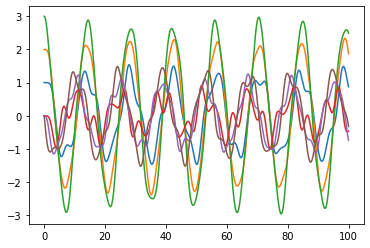

In [43]:
plt.plot(tspan,sol[:,])
plt.show()